<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

In [3]:
url="e://Netology//doc//creditcard.csv"
df=pd.read_csv(url)
df.head(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [6]:
np.isnan(df)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Nan значений нет

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [4]:
df.groupby('Class').count()['Time']

Class
0    284315
1       492
Name: Time, dtype: int64

<BarContainer object of 2 artists>

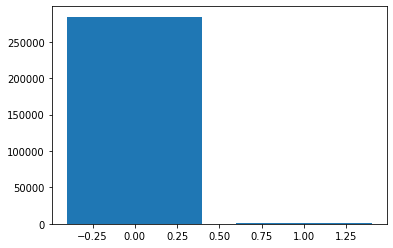

In [6]:
plt.bar([0,1],df.groupby('Class').count()['Time'])

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [30]:
df0 = df[(df['Class']==0) & (df['Amount'] <= 1000)]  #
df1 = df[df['Class']==1]

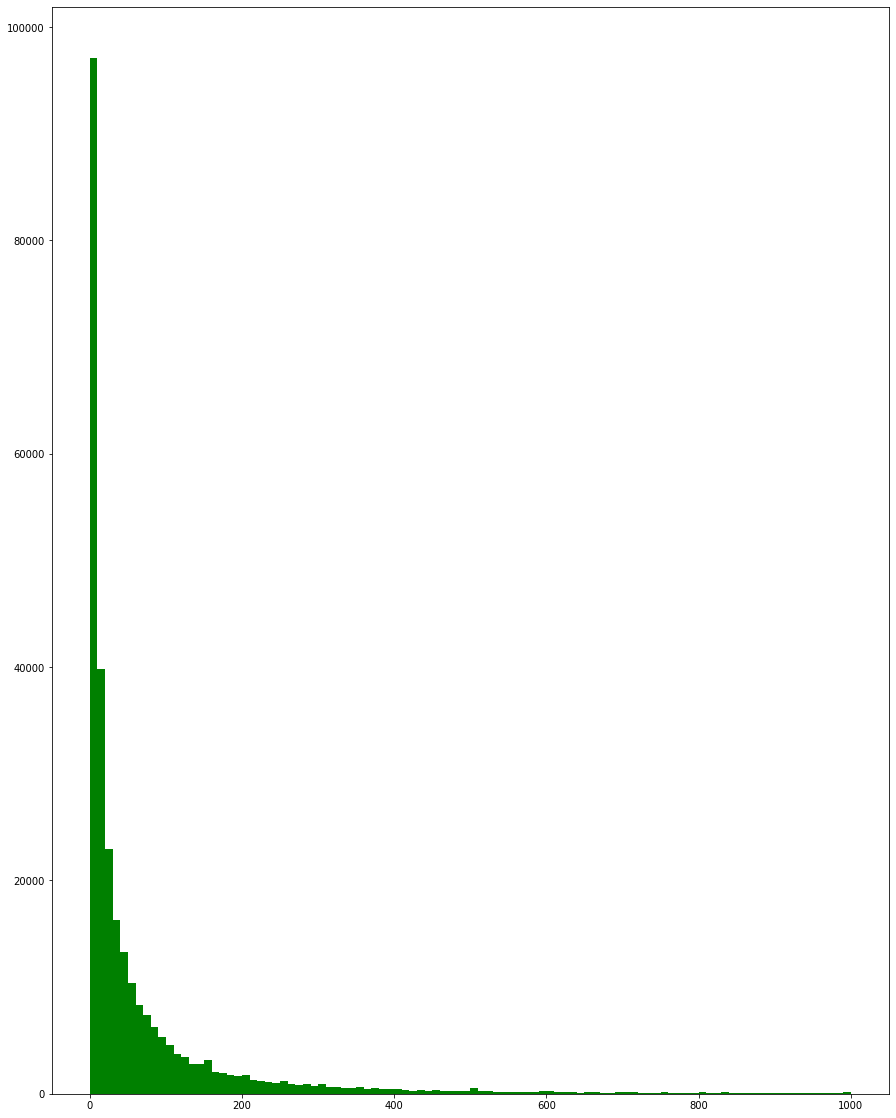

In [31]:

plt.figure(figsize=(15,20))
plt.hist(df0['Amount'],bins=100,facecolor='g')
plt.show()


In [1]:
print('Сумма нормальных операций',df[df['Class']==0]['Amount'].sum())
print('Сумма обманных операций',df[df['Class']==1]['Amount'].sum())

NameError: name 'df' is not defined

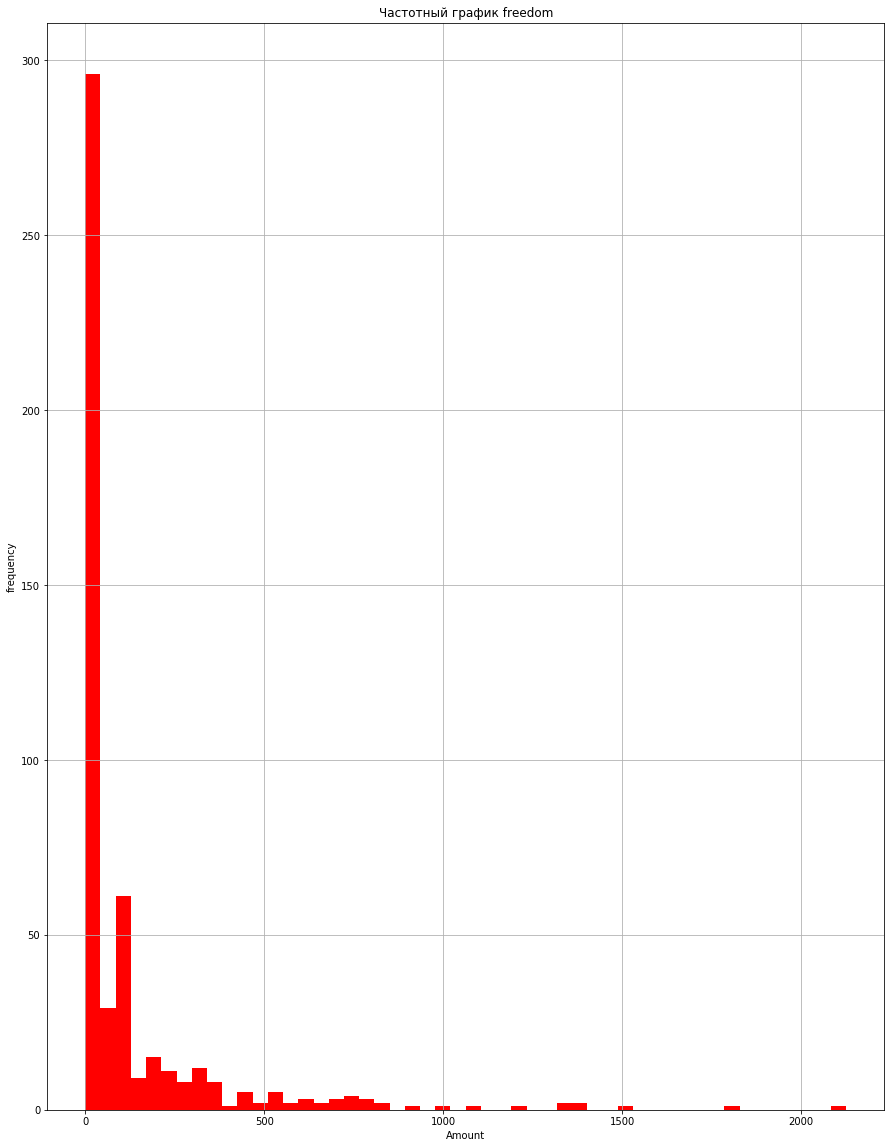

In [19]:
plt.figure(figsize=(15,20))
plt.hist(df1['Amount'], bins= 50,facecolor='r')

plt.xlabel('Amount')
plt.ylabel('frequency')
plt.title('Частотный график freedom')
plt.grid(True)
plt.show()

**5. Построить графики histograms для всех значений**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000032AD3E3C88>,
      dtype=object)

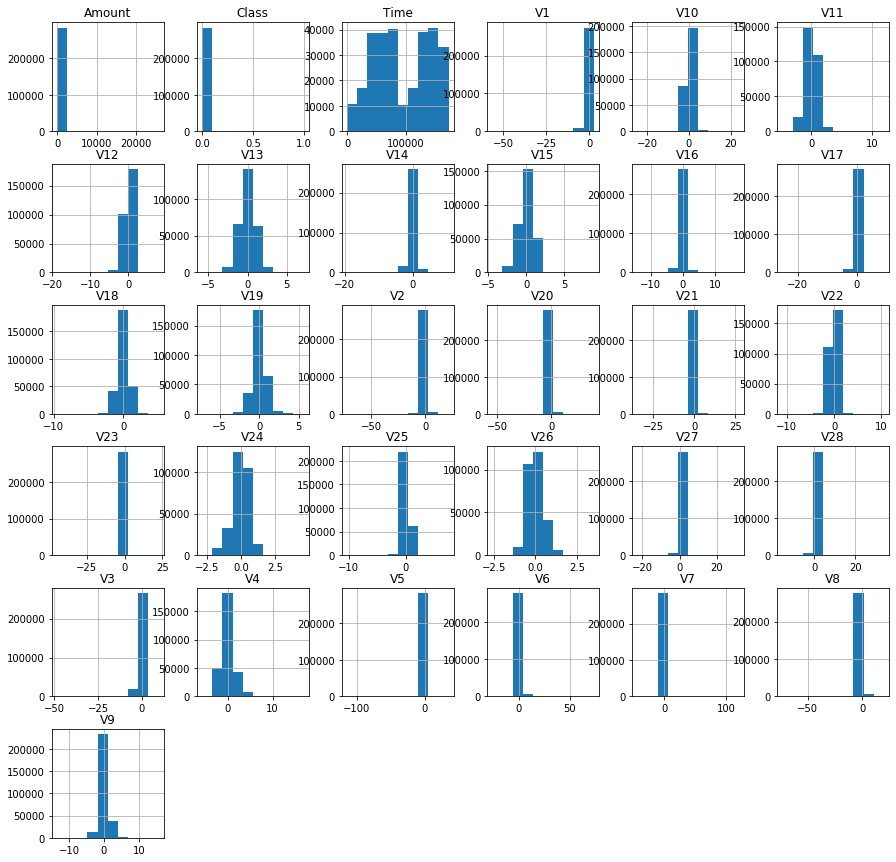

In [35]:
df.hist(figsize=(15,15))

**6. Построить матрицу корреляций для всех значений**

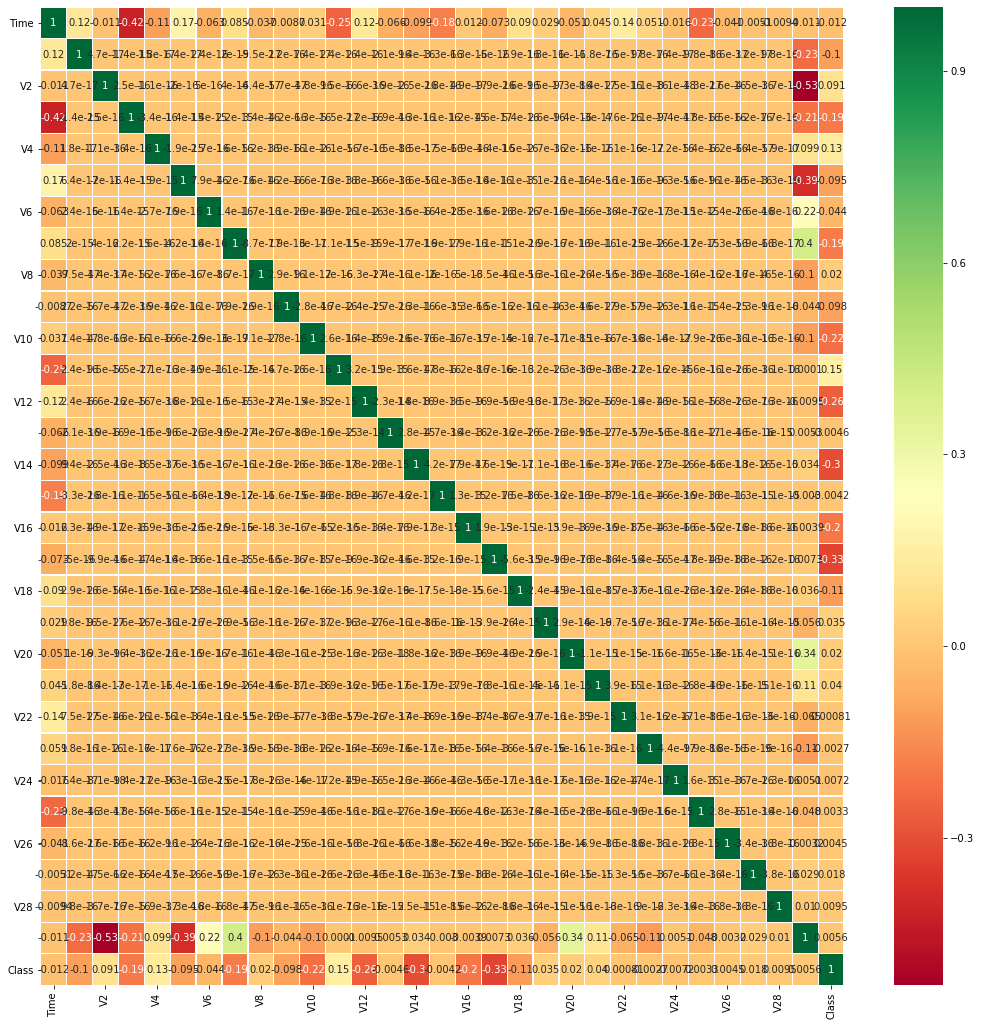

In [37]:
import seaborn as sns

sns.heatmap(df.corr(),cmap='RdYlGn',annot=True,linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(18,18)
plt.show()

In [ ]:
# что-то какая-то грустная картина по корреляции

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

In [8]:
X = df.drop('Class', axis=1)
Y = df.Class

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=27)

In [11]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [12]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.90      0.64      0.75       132

    accuracy                           1.00     71202
   macro avg       0.95      0.82      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [15]:
#нормализуем значения
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
headers = list(df.columns.values)
np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [16]:
X_n = df_norm.drop('Class', axis=1)
Y_n = df_norm.Class
X_train, X_test, y_train, y_test = train_test_split(X_n,Y_n, test_size=0.25, random_state=27)
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     71070
         1.0       0.94      0.60      0.73       132

    accuracy                           1.00     71202
   macro avg       0.97      0.80      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#  даже чуть ухудшилась модель

**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

NameError: name 'sns' is not defined

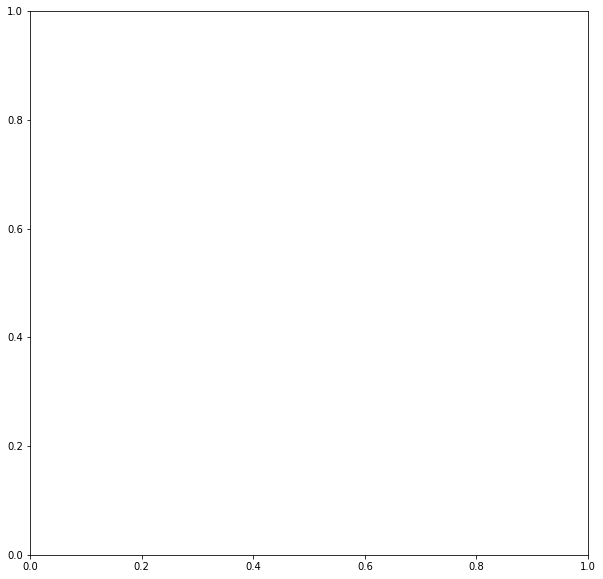

In [18]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)



No handles with labels found to put in legend.


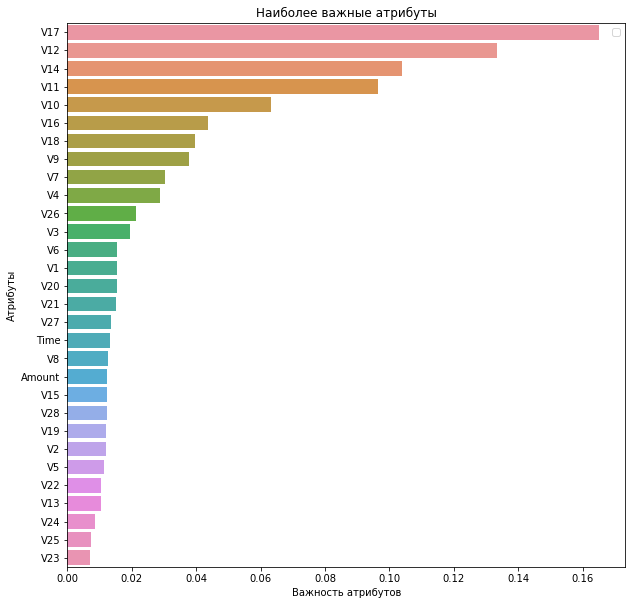

In [20]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [21]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     71070
         1.0       0.98      0.81      0.89       132

    accuracy                           1.00     71202
   macro avg       0.99      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202



0.9996207971686188

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**

In [23]:
pip install imblearn

  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'c:\\users\\pgridchina\\anaconda3\\lib\\site-packages\\~klearn\\decomposition\\cdnmf_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

# Задание для интересующихся time-series (временными рядами)

Есть датасет потребления электроэнергии.

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/household_power_consumption.txt"

In [4]:
df = pd.read_csv(url, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Хороший пример для LSTM модели можно найти здес